In [1]:
from sklearn.datasets import make_moons # 머신러닝 라이브러리

In [2]:
import matplotlib.pyplot as plt # 그림그리기

In [3]:
import numpy as np

In [4]:
def sigmoid(z): 
    return 1.0/(1+np.exp(-z))

In [5]:
def loss(y,y_hat): # Cross Entropy Loss(y, y^hat)
    loss = -np.mean(y*(np.log(y_hat)) - (1-y)*np.log(1-y_hat))
    return loss

In [6]:
def gradients(X, y, y_hat):
    # x ---> 입력 (input)
    # y ---> 정답(target / label)
    # y_hat ---> 가설(모델의 출력, hypothesis/예측치(prediction/추정))
    # w ---> weight (파라미터, theta / 우리가 구하고자 하는 값)
    # b ---> bias (파라미터, theta 0)
    
    # m ---> 학습(trainging) 데이터의 갯수
    m = X.shape[0]
    
    # Cost(Loss)를 weight로 미분함
    dw = (1/m)*np.dot(X.T , (y_hat-y))
    
    # Cost(Loss)를 bias로 미분함
    db = (1/m)*np.sum((y_hat-y))
    
    return dw, db

In [14]:
def plot_decision_boundary(X, w, b):
    # X = 입력
    # w = 가중치
    # b = bais
    
    # 직선은 y =mx +c
    # 그래서 직선의 방정식 mx+c = w.X +b
    # m과 c를 풀어라
    x1 = [min(X[:,0]), max(X[:,0])] # X[:,0] X의 모든행을 가져오고 0열 선택
    m = -w[0]/w[1]
    c = -b/w[1]
    x2 = m*x1 +c
    
    #그림 그리기
    fig = plt.figure(figsize=(10,8))
    plt.plot(X[:,0][y==0],X[:,1][y==0],"g^")
    plt.plot(X[:,0][y==1],X[:,1][y==1],"bs")
    plt.xlim([-2,2]) # x구간 지정
    plt.ylim([0,2.2]) #ylimit (y 구간지정)
    plt.xlabel("feature 1")
    plt.ylabel("feature 2")
    plt.title("Decision Boundary")
    plt.plot(x1, x2, 'y-')

In [8]:
def normalize(X):
    # X <= 입력
    # m <= training 개수
    # n <= feature 의 갯수 (weight 와 내적하는 것)
    m, n= X.shape #(m ,n) m행 n열
    # X 행렬의 모든 n개의 feature들을 정규화함
    for i in range(n):
        X = (X - X.mean(axis=0))/X.std(axis=0) 
        #어제 했던 수식(데이터와 평균의 차이를) 표준편차(standard deviation)으로 나눔
    return X

In [12]:
#Train 함수
## 이 함수에서 gradient descent를 반복하여 학습을 하고 weight 와 bais를 구함
def train(X, y, bs, epochs, lr): #epoch는 반복횟수
    # X <- 입력
    # y <- true / target
    # epoch는 반복횟수
    # lr = learning rate(학습율)
    
    #m <- 학습데이터의 수
    #n <- feature의 수
    
    m,n = X.shape
    #weight 와 bias 초기화
    w = np.zeros((n,1))
    b=0
    # y를 reshape함(형태를 맞춤)
    y=y.reshape(m,1)
    #입력 데이터 normalize
    x = normalize(X)
    #LOSS를 저장하기 위한 빈 LIST 생성
    losses = []
    # 학습
    for epoch in range(epochs):
        for i in range((m-1)//bs+1):
            #batch 정의, SGD(Stocastric(통계적0), Gradient Descent)
            start_i = i*bs # bs(배치 사이즈)
            end_i = start_i +bs
            xb = X[start_i:end_i]
            yb = y[start_i:end_i]
            
            #hypothesis / 예측 계산
            y_hat = sigmoid(np.dot(xb,w)+b)
            #loss를 파라미터로 미분
            dw, db = gradients(xb, yb, y_hat)
            #파라미터 갱신
            w -= lr*dw
            b -= lr*db
        l= loss(y, sigmoid(np.dot(X,w)+b))
        losses.append(l)
    # weight 와 bias, loss 반환
    return w,b, losses

In [10]:
# 예측 함수
def predict(X):
    # X <- 입력
    # 입력 데이터 normalize
    x = normalize(X)
    
    # 예측/ 추정치/ y_hat 계산
    preds = sigmoid(np.dot(X,w)+b)
    # 예측 데이터 저장 리스트 생성
    pred_class=[]
    #y_hat >= 0.5 -> 1로 결과를 출력
    #y_hat < 0.5 -> 0 결과를 출력
    pred_class = [1 if i > 0.5 else 0 for i in preds]
    return np.array(pred_class)

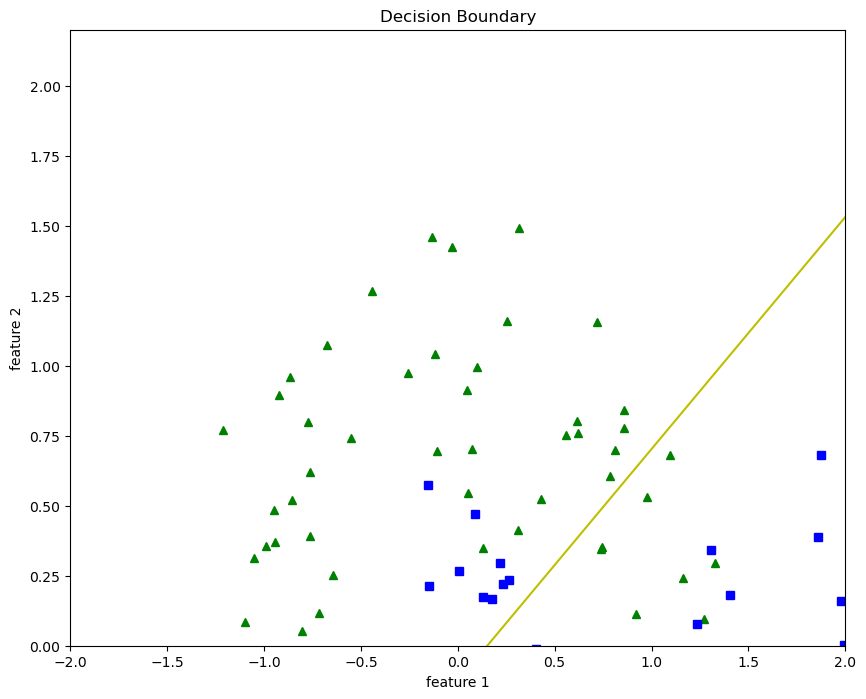

In [15]:
# 학습
X, y = make_moons(n_samples=100, noise=0.24)
w, b, l = train(X,y,bs=100,epochs=1000,lr=0.01)
#그림 그리기
plot_decision_boundary(X,w,b)

In [ ]:
from sympy import symbols , Matrix , Function, simplify, exp, hessian, solve, init_printing
x1, x2 = symbols('x1 x2')
f, g, h =symbols('f g h' , cls=Function)

X = Matrix([x1, x2])
f = Matrix([-x1*x2*exp(-(x1**2+x2**2)/2)])
h = 2*x1+3*x2
g = x1**2+x2**2-10

In [ ]:
X = np.arange(-3,3,0.01)
y=sigmoid(X)

In [ ]:
def derivative(f,x):
    h=0.00001
    return (f(x+h)-f(x))/h

In [ ]:
derivated = derivative(sigmoid,X)

In [ ]:
gradf = simplify(f.jacobian(X))
gradf

In [ ]:
hessian = simplify(hessian(f,X))
hessian

In [51]:
y_hat = np.array(X[:10][:,0]) # y_hat이라 가정합니다
np.shape(y_hat)

(10,)

In [60]:
y_true = [np.random.randint(10) for i in range(10)]
y_true

[9, 7, 1, 7, 9, 6, 2, 6, 8, 0]

In [61]:
y_ture[0] * np.log(np.abs(y_hat[0])) + (1-y_true[0])*np.log(np.abs(1-y_hat[0]))

7.459779745413685

In [81]:
result=0

for i in range(10):
    result += y_ture[i] * np.log(np.abs(y_hat[i])) + (1-y_true[i])*np.log(np.abs(1-y_hat[i]))
-result / 10

0.8251770164746912

In [90]:
for i,j in zip(y_true,y_hat):
    #print(i,j)
    pass

In [83]:
cross_entropy=0
for i,j in zip(y_true,y_hat):
    cross_entropy += i * np.log(np.abs(j)) + (1-i)*np.log(np.abs(1-j))
count= len(y_true)
-cross_entropy/count

0.19333681290323265

In [35]:
X, y = make_moons(n_samples=100, noise=0.24)
print('X:',np.shape(X)) # X데이터 (100행 2열 행렬)
print('y:',np.shape(y)) # y데이터 (100행 벡터)
bs=15
m=20
for epoch in range(10):
    for i in range((m-1)//bs+1):
        #batch 정의, SGD(Stocastric(통계적0) Gradient Descent)
        start_i = i*bs # bs (배치사이즈)
        end_i = start_i +bs
        xb = X[start_i : end_i]
        yb = y[start_i : end_i]
        print('start:', start_i , ',end:',end_i, ',epoch :', epoch)

X: (100, 2)
y: (100,)
start: 0 ,end: 15 ,epoch : 0
start: 15 ,end: 30 ,epoch : 0
start: 0 ,end: 15 ,epoch : 1
start: 15 ,end: 30 ,epoch : 1
start: 0 ,end: 15 ,epoch : 2
start: 15 ,end: 30 ,epoch : 2
start: 0 ,end: 15 ,epoch : 3
start: 15 ,end: 30 ,epoch : 3
start: 0 ,end: 15 ,epoch : 4
start: 15 ,end: 30 ,epoch : 4
start: 0 ,end: 15 ,epoch : 5
start: 15 ,end: 30 ,epoch : 5
start: 0 ,end: 15 ,epoch : 6
start: 15 ,end: 30 ,epoch : 6
start: 0 ,end: 15 ,epoch : 7
start: 15 ,end: 30 ,epoch : 7
start: 0 ,end: 15 ,epoch : 8
start: 15 ,end: 30 ,epoch : 8
start: 0 ,end: 15 ,epoch : 9
start: 15 ,end: 30 ,epoch : 9
